<a href="https://colab.research.google.com/github/ruchithareddy296/2216139_AIML_BootCamp/blob/main/assignment5(set1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
df=pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [16]:
#initiaize the list elements
data=[0.2,0.4,0.6,0.8]
df=pd.DataFrame(data,columns=["bateria_size"])
df["max_growth"]=[3.4,3.8,4.2,4.6]
df

,bateria_size,max_growth
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


In [17]:
x_train=df.iloc[:3,:-1]
y_train=df.iloc[:3,-1:]
x_test=df.iloc[3:,:-1]
y_test=df.iloc[3:,-1:]

In [18]:
x_train

,bateria_size
0,0.2
1,0.4
2,0.6


In [19]:
y_train

,max_growth
0,3.4
1,3.8
2,4.2


In [20]:
x_test

,bateria_size
3,0.8


In [21]:
y_test

,max_growth
3,4.6


In [22]:
import sympy as sym
from sympy import *

In [23]:
#step1:Initialize model parameters
mi = 1                                                                            
ci = -1
n = 0.01
epochs = 50
y=1
x=1
m=1
c=1

iter = 1
ns = len(x_train)
 
# Step2: Start iteration
for iter in range(1,epochs+1):
  
  print("Iteration : {}".format(iter))
  print('++++++++++++++++++++++++++++')
  #step3: track samples
  for sample in range(0,ns):
    xa = x_train['bateria_size'][sample] #0.2
    ya = y_train['max_growth'][sample] #3.4
    print("-->sample {}".format(sample+1)+" x={}".format(xa)+" y={}".format(ya))

    #step 4:Calculate the Gradient
    E = (0.5) *(y-m*x-c)**2 #error Function
    x = sym.Symbol('x')
    y = sym.Symbol('y')
    m = sym.Symbol('m')
    c = sym.Symbol('c')

    deltaE_m = sym.diff(E,m)
    deltaE_c = sym.diff(E,c)

    #substituting values
    deltaE_m=deltaE_m.subs(m,mi)
    deltaE_m=deltaE_m.subs(c,ci)
    deltaE_m=deltaE_m.subs(x,xa)
    deltaE_m=deltaE_m.subs(y,ya)

    deltaE_c=deltaE_c.subs(m,mi)
    deltaE_c=deltaE_c.subs(c,ci)
    deltaE_c=deltaE_c.subs(x,xa)
    deltaE_c=deltaE_c.subs(y,ya)

    print('deltaE_m:',deltaE_m)
    print('deltaE_c',deltaE_c)

    #Step5: Calculate step length
    del_m=-n*deltaE_m
    del_c=-n*deltaE_c

    #step6:Updating model parameters
    mi=mi+del_m
    ci=ci+del_c
    print("m:{}".format(mi))
    print("c:{}".format(ci))

print('++++++++++++++++++++++++++++++++++++++')
print('Optimal Values:')
print("m:{}".format(mi))
print("c:{}".format(ci))

Iteration : 1
++++++++++++++++++++++++++++
-->sample 1 x=0.2 y=3.4
deltaE_m: 0
deltaE_c 0
m:1
c:-1
-->sample 2 x=0.4 y=3.8
deltaE_m: -1.76000000000000
deltaE_c -4.40000000000000
m:1.01760000000000
c:-0.956000000000000
-->sample 3 x=0.6 y=4.2
deltaE_m: -2.72726400000000
deltaE_c -4.54544000000000
m:1.04487264000000
c:-0.910545600000000
Iteration : 2
++++++++++++++++++++++++++++
-->sample 1 x=0.2 y=3.4
deltaE_m: -0.820314214400000
deltaE_c -4.10157107200000
m:1.05307578214400
c:-0.869529889280000
-->sample 2 x=0.4 y=3.8
deltaE_m: -1.69931983056896
deltaE_c -4.24829957642240
m:1.07006898044969
c:-0.827046893515776
-->sample 3 x=0.6 y=4.2
deltaE_m: -2.63100330314758
deltaE_c -4.38500550524596
m:1.09637901348117
c:-0.783196838463316
Iteration : 3
++++++++++++++++++++++++++++
-->sample 1 x=0.2 y=3.4
deltaE_m: -0.792784207153417
deltaE_c -3.96392103576708
m:1.10430685555270
c:-0.743557628105646
-->sample 2 x=0.4 y=3.8
deltaE_m: -1.64073395435383
deltaE_c -4.10183488588457
m:1.12071419509624
c

In [24]:
#y =1.77x+0.99 --> BestFit Line
y_train_pred=[]
for i in range(0,len(x_train)):
  y_cal = mi*x_train['bateria_size'][i]+ci
  y_train_pred.append(y_cal)
y_train_pred

[2.57519474125736, 3.02739594860361, 3.47959715594985]

In [25]:
y_train_list = list(y_train['max_growth'])
y_train_list

[3.4, 3.8, 4.2]

In [26]:
x_train_list=list(x_train['bateria_size'])
x_train_list

[0.2, 0.4, 0.6]

In [27]:
Error=[]
for i in range(0,len(x_train)):
  err=(y_train_list[i]-y_train_pred[i])
  Error.append(err)
Error

[0.824805258742636, 0.772604051396395, 0.720402844050153]

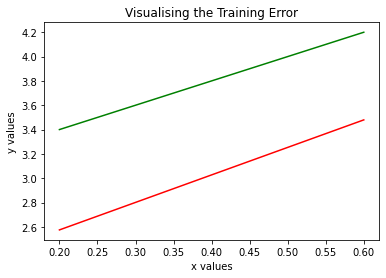

In [28]:
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_predicted',color='red')

plt.title('Visualising the Training Error')
plt.xlabel('x values')
plt.ylabel('y values')

plt.show()